La validación cruzada es el método más simple y  utilizado para estimar el error de predicción. Este método estima directamente el error $Err = E [L (Y, \hat{f}(X))]$, el error de prueba promedio cuando el método $\hat{f}(X)$ se aplica a una muestra de prueba independiente de la distribución conjunta de $X,Y$. La validación cruzada normalmente estima bien unicamente el error de predicción esperado.

In [202]:
from   sklearn.model_selection import KFold
import numpy                   as     np
import pandas                  as     pd
import matplotlib.pylab        as     plt

In [203]:
sec=range(25,50,1) #crea una sucesion de numeros de 0 24

In [204]:
np.take(sec,[i for i in range(len(sec))])  #toma elementos de un array a lo largo de eje

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49])

In [205]:
kf5 = KFold(n_splits=5, shuffle=False)  #provee indices train/test para segmentar la muestra en train y test

In [206]:
#verificamos los indices de los conjuntos de prueba y test
for train_index, test_index in kf5.split(sec):
    print(train_index, test_index)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]
[ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]


In [207]:
#verificamos el contenido de las muestra de entrenamiento y validación
for train_index, test_index in kf5.split(sec):
    print(np.take(sec,train_index), np.take(sec,test_index))

[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49] [25 26 27 28 29]
[25 26 27 28 29 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49] [30 31 32 33 34]
[25 26 27 28 29 30 31 32 33 34 40 41 42 43 44 45 46 47 48 49] [35 36 37 38 39]
[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 45 46 47 48 49] [40 41 42 43 44]
[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] [45 46 47 48 49]


In [219]:
def kfold(kfd, ar, paso=1):
    """
    funccion que regresa dos dataframe uno de test y otro de training con los indices,
    muestras y un parametro val para ir aumentando el k fold 
    :param kfd: obejeto kfold
    :param ar: el range 
    :param paso: paso default 1
    :return: una tupla train,test
    """
    
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kfd.split(ar):
        train_df = pd.DataFrame(np.take(ar, train_index), columns=["x"])
        train_df["val"] = i + paso  
        train = train.append(train_df)
        test_df = pd.DataFrame(np.take(ar, test_index), columns=["x"])
        test_df["val"] = i + paso
        test = test.append(test_df)
        i += 1
    return train, test

In [215]:
kf5 = KFold(n_splits=5, shuffle=False)
train5, test5 = kfold(kf5,sec)

Para obtener el error de predicción se calcula el error en cada uno de los conjuntos de prueba, y despues se promedia sobre cada uno de ellos, teniendo así el error de predicción de la siguiente manera.

$$
CV(\hat{f})=\dfrac{1}{N}\sum_{i=1}^NL(y_i,\hat{f}^{k(i)}(x_i))
$$
donde $\hat{f}^{k(i)}$ denota la función ajustada, calculada con la k-ésima parte de los datos de prueba

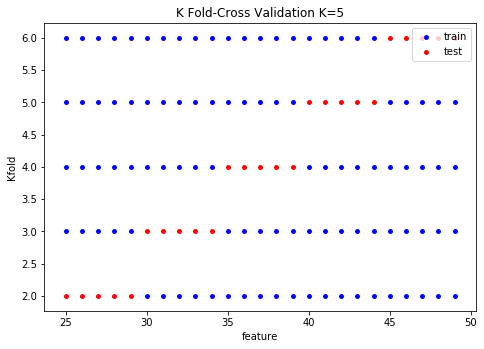

In [221]:
fig=plt.figure()
ax=fig.add_axes([1,1,1,1])
ax.scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax.scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax.set_ylabel("Kfold")
ax.set_xlabel("feature")
ax.set_title("K Fold-Cross Validation K=5")
plt.legend()
plt.show()

Por lo general se suele tomar $k=5$ o $k=10$. El caso $K = N$ se conoce como $\textbf{leave-one-out}$. En este caso, $κ(i)= i$, y para la $i-esima$ observación, el ajuste se calcula utilizando todos los datos excepto el.